CS166 Pre-class work 14.1
# Gambler's Ruin
#### April 14, 2020 | Rebecca Mqamelo 

In [32]:
import random as rn 
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from PIL import Image

Play the betting game at https://gamesfortraders.com/coin-challenge/. The game works like this.

> ● A biased coin that comes up heads 60% of the time is flipped repeatedly.

> ● You start with USD250 and can bet any available amount of money on the next coin flip.

> ● Select Heads or Tails and how much money you want to bet.

> ● If you predicted the outcome of the coin flip correctly, you get back double your bet (if
you bet USD10 you get back your original bet and an extra USD10.

> ● If you were wrong about the outcome you get back nothing (you lose the full amount you
bet).


**Task:** Devise and describe a betting strategy to try and maximize the amount of money you end
up with after 20 bets. Possible examples (these are not optimal)—

> ● Bet half your remaining money every time and always bet on heads.

> ● Place 2 bets on heads followed by 1 bet on tails, and always place a USD10 bet (or all your
remaining money if you have less than USD10 left).
Explain why you think your strategy is a good way to maximize returns when betting on a 60%
biased coin.

**Task:** Play the game at the link above using the betting strategy you described. Place a total of
20 bets (or fewer if you run out of money). Take a screenshot of the results when you are done.
Be honest! — Show the real results of applying your betting strategy to this game.

### STRATEGY:
**"Big gains, small losses":** Place bug bets when winning (e.g. USD200, I have more money to lose) and small bets when losing (e.g. USD50, I have less money to lose). Below, the strategy didn't turn out too bad...

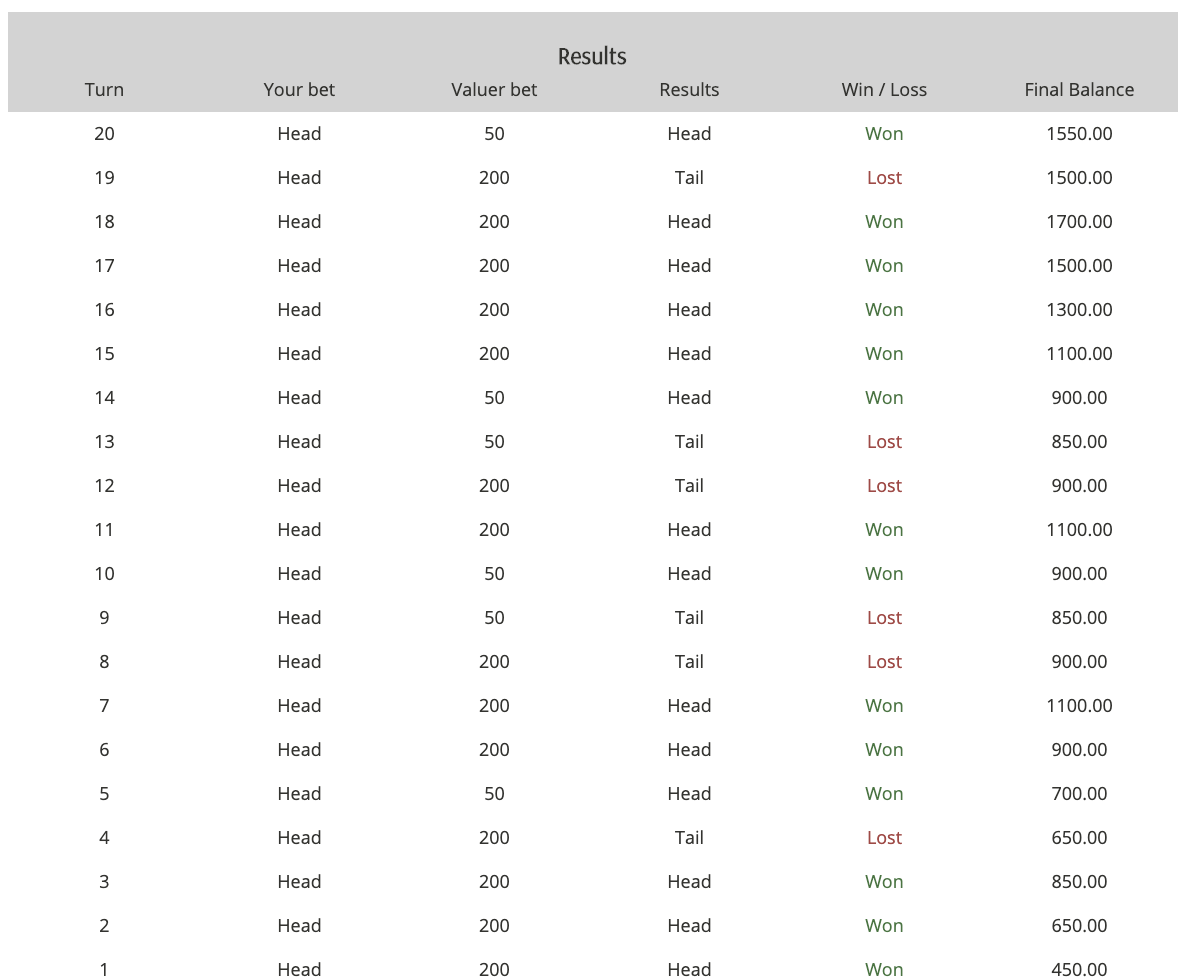

In [33]:
Image.open('Screen Shot 2020-04-14 at 3.18.57 PM.png')

In [34]:
def flip_coin(p):
    return True if rn.random() < p else False

# 1000 trials consistin gof 20 bets each
n, pr, count, record = 10**3, .5, 0, []
for _ in range(n):
    track = []
    balance = 250
    # Restrict to the max amount and 20 bets only:
    while (0 < balance < 2500) and len(track) < 21:
        # Bet $7255 if you've lost (count will reset t 0 at every win) 
        bet = 50 if count < 1 else 200
        if flip_coin(pr):
            count = 0
            balance += bet
        else:
            count += 1
            balance -= bet
        track.append(balance)
        #count += 1
    record.append(track)
      
print(record[:2])

[[200, 400, 350, 150, 350, 300, 100, -100], [50, -150]]


In [35]:
won, lost = 0, 0
for _ in record:
    if _[-1] < 0: lost +=1
    else: won +=1

amount = np.array([track[-1] for track in record])
print('% losses:', round(lost/(lost+won), 2), 
      '\n% wins:', round(won/(lost+won), 2),
      '\n confidence interval:', round(np.percentile(amount, 5), 2), 
      round(np.percentile(amount, 95), 2))

% losses: 0.41 
% wins: 0.59 
 confidence interval: -150.0 1252.5


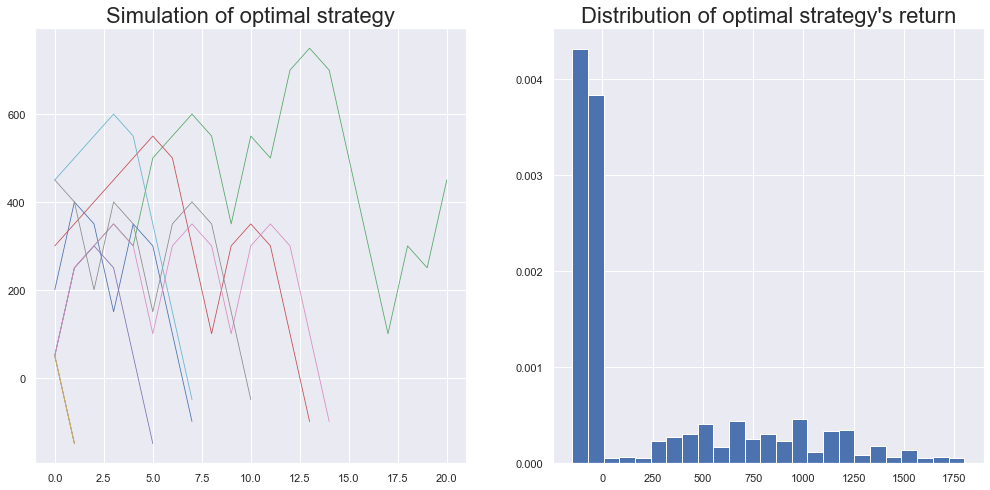

In [36]:
plt.figure(figsize=(17, 8))
plt.subplot(1,2,1)
for _ in record[:10]:
    plt.plot(_, linewidth=.8)
plt.title('Simulation of optimal strategy', fontsize=22)

plt.subplot(1,2,2)
plt.hist([track[-1] for track in record], density=True, bins=25)
plt.title("Distribution of optimal strategy's return", fontsize=22)
plt.show()

Clearly, my strategy isn't so great: in the majority of cases I still made a loss!